In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from pandas import DatetimeIndex
import socket, struct 

pd.set_option('display.max_columns', 500)
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_parquet('merged_nf.gzip')

In [3]:
print("This dataset has {} columns and {} rows".format(df.shape[1],df.shape[0]))

This dataset has 25 columns and 3000000 rows


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 25 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IPV4_SRC_ADDR               object 
 1   L4_SRC_PORT                 int64  
 2   IPV4_DST_ADDR               object 
 3   L4_DST_PORT                 int64  
 4   PROTOCOL                    int64  
 5   IN_BYTES                    int64  
 6   IN_PKTS                     int64  
 7   OUT_BYTES                   int64  
 8   OUT_PKTS                    int64  
 9   TCP_FLAGS                   int64  
 10  FLOW_DURATION_MILLISECONDS  int64  
 11  MIN_IP_PKT_LEN              int64  
 12  MAX_IP_PKT_LEN              int64  
 13  SRC_TO_DST_SECOND_BYTES     float64
 14  DST_TO_SRC_SECOND_BYTES     float64
 15  RETRANSMITTED_IN_BYTES      int64  
 16  RETRANSMITTED_IN_PKTS       int64  
 17  RETRANSMITTED_OUT_BYTES     int64  
 18  RETRANSMITTED_OUT_PKTS      int64  
 19  TCP_WIN_MAX_IN       

In [5]:
df.describe(include=[object])

IPV4_SRC_ADDR  IPV4_DST_ADDR   Attack L7_PROTO_NAME PROTOCOL_MAP
count           3000000        3000000  3000000       2270817      3000000
unique            37465          11937       21            58            6
top     192.168.100.148  192.168.100.3   Benign           CBT          tcp
freq             421688         565344   992765        992316      1846223

In [6]:
df.describe()

L4_SRC_PORT   L4_DST_PORT      PROTOCOL      IN_BYTES       IN_PKTS   
count  3.000000e+06  3.000000e+06  3.000000e+06  3.000000e+06  3.000000e+06  \
mean   4.038722e+04  3.350640e+03  1.024170e+01  9.915695e+02  9.670526e+00   
std    1.842122e+04  1.068101e+04  5.654876e+00  8.326632e+04  5.763028e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00  1.000000e+00   
25%    2.724000e+04  8.000000e+01  6.000000e+00  5.600000e+01  1.000000e+00   
50%    4.573000e+04  8.000000e+01  6.000000e+00  1.120000e+02  2.000000e+00   
75%    5.504500e+04  4.430000e+02  1.700000e+01  2.800000e+02  3.000000e+00   
max    6.553500e+04  6.553500e+04  2.550000e+02  7.405536e+07  1.926100e+05   

          OUT_BYTES      OUT_PKTS     TCP_FLAGS  FLOW_DURATION_MILLISECONDS   
count  3.000000e+06  3.000000e+06  3.000000e+06                3.000000e+06  \
mean   3.034575e+03  4.649585e+00  2.418990e+01                2.315053e+06   
std    2.536018e+05  1.928144e+02  5.845195e+01                2.140399e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00                0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00                0.000000e+00   
50%    0.000000e+00  0.000000e+00  2.000000e+00                4.293061e+06   
75%    1.520000e+02  1.000000e+00  2.200000e+01                4.294029e+06   
max    1.554980e+08  1.045650e+05  2.230000e+02                4.294967e+06   

       MIN_IP_PKT_LEN  MAX_IP_PKT_LEN  SRC_TO_DST_SECOND_BYTES   
count    3.000000e+06    3.000000e+06             3.000000e+06  \
mean     2.356534e+01    2.649258e+02            2.196007e+298   
std      2.696914e+01    4.320319e+02                      inf   
min      0.000000e+00    2.800000e+01             0.000000e+00   
25%      0.000000e+00    4.000000e+01             6.800000e+01   
50%      0.000000e+00    1.000000e+02             1.408000e+03   
75%      4.000000e+01    1.400000e+02             3.806000e+03   
max      5.470000e+02    6.521200e+04            6.588022e+304   

       DST_TO_SRC_SECOND_BYTES  RETRANSMITTED_IN_BYTES  RETRANSMITTED_IN_PKTS   
count             3.000000e+06            3.000000e+06           3.000000e+06  \
mean             1.386680e+151            8.017808e+01           3.958197e-01   
std                        inf            6.931635e+03           1.240083e+01   
min               0.000000e+00            0.000000e+00           0.000000e+00   
25%               0.000000e+00            0.000000e+00           0.000000e+00   
50%               0.000000e+00            0.000000e+00           0.000000e+00   
75%               1.640000e+02            0.000000e+00           0.000000e+00   
max              4.160041e+157            6.321251e+06           1.272900e+04   

       RETRANSMITTED_OUT_BYTES  RETRANSMITTED_OUT_PKTS  TCP_WIN_MAX_IN   
count             3.000000e+06            3.000000e+06    3.000000e+06  \
mean              5.691843e+02            5.734313e-01    6.023915e+03   
std               1.408053e+04            1.007526e+01    1.324776e+04   
min               0.000000e+00            0.000000e+00    0.000000e+00   
25%               0.000000e+00            0.000000e+00    0.000000e+00   
50%               0.000000e+00            0.000000e+00    5.120000e+02   
75%               0.000000e+00            0.000000e+00    4.096000e+03   
max               3.953335e+06            2.909000e+03    6.553500e+04   

       TCP_WIN_MAX_OUT         Label  
count     3.000000e+06  3.000000e+06  
mean      8.379874e+03  6.690783e-01  
std       1.769573e+04  4.705450e-01  
min       0.000000e+00  0.000000e+00  
25%       0.000000e+00  0.000000e+00  
50%       0.000000e+00  1.000000e+00  
75%       0.000000e+00  1.000000e+00  
max       6.553500e+04  1.000000e+00

In [7]:
# Can ignore NaN values
df.nunique()

IPV4_SRC_ADDR                 37465
L4_SRC_PORT                   65536
IPV4_DST_ADDR                 11937
L4_DST_PORT                   62352
PROTOCOL                        234
IN_BYTES                      12308
IN_PKTS                        1605
OUT_BYTES                     23860
OUT_PKTS                       1136
TCP_FLAGS                        43
FLOW_DURATION_MILLISECONDS     2641
MIN_IP_PKT_LEN                  102
MAX_IP_PKT_LEN                 1521
SRC_TO_DST_SECOND_BYTES       26366
DST_TO_SRC_SECOND_BYTES       30917
RETRANSMITTED_IN_BYTES         3242
RETRANSMITTED_IN_PKTS           198
RETRANSMITTED_OUT_BYTES        3830
RETRANSMITTED_OUT_PKTS          356
TCP_WIN_MAX_IN                 6799
TCP_WIN_MAX_OUT                2244
Label                             2
Attack                           21
L7_PROTO_NAME                    58
PROTOCOL_MAP                      6
dtype: int64

In [8]:
df.duplicated().sum()

6929

In [9]:
print("Total de valores nulos")
print(df.isnull().sum())

Total de valores nulos
IPV4_SRC_ADDR                      0
L4_SRC_PORT                        0
IPV4_DST_ADDR                      0
L4_DST_PORT                        0
PROTOCOL                           0
IN_BYTES                           0
IN_PKTS                            0
OUT_BYTES                          0
OUT_PKTS                           0
TCP_FLAGS                          0
FLOW_DURATION_MILLISECONDS         0
MIN_IP_PKT_LEN                     0
MAX_IP_PKT_LEN                     0
SRC_TO_DST_SECOND_BYTES            0
DST_TO_SRC_SECOND_BYTES            0
RETRANSMITTED_IN_BYTES             0
RETRANSMITTED_IN_PKTS              0
RETRANSMITTED_OUT_BYTES            0
RETRANSMITTED_OUT_PKTS             0
TCP_WIN_MAX_IN                     0
TCP_WIN_MAX_OUT                    0
Label                              0
Attack                             0
L7_PROTO_NAME                 729183
PROTOCOL_MAP                       0
dtype: int64


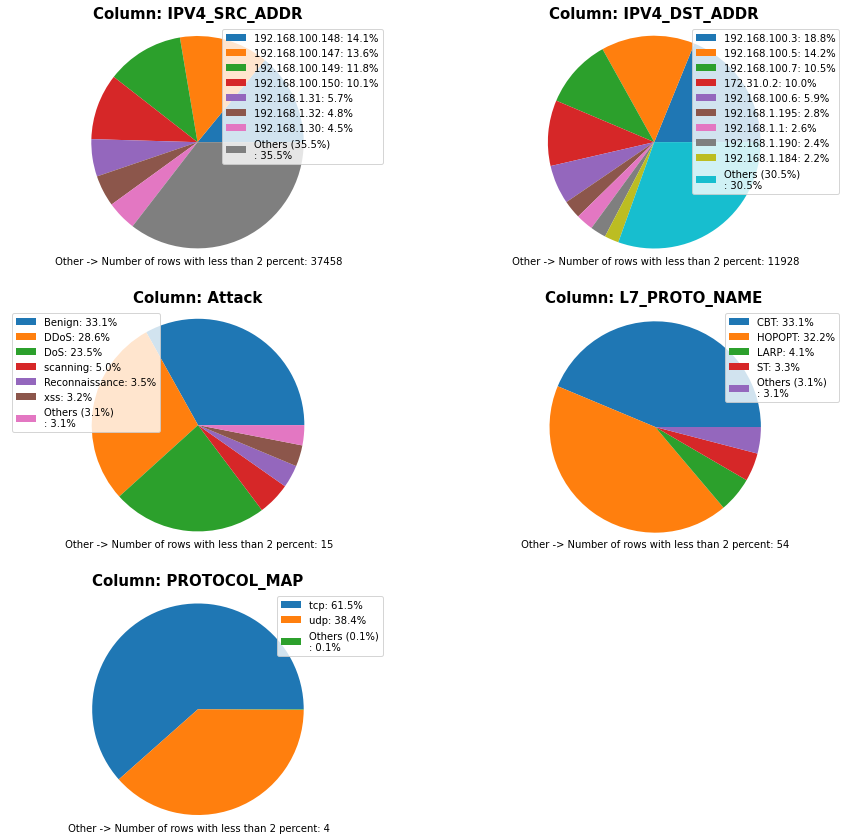

In [10]:
cols = ["IPV4_SRC_ADDR", "IPV4_DST_ADDR", "Attack", "L7_PROTO_NAME", "PROTOCOL_MAP"]
fig_nr_columns = 2
fig_nr_rows = 4
fig = plt.figure(1, figsize=[15,20])
percentage = 2

for k in range(len(cols)):
    value_counts = df[cols[k]].value_counts()
    percentage_values = (value_counts / len(df)) * 100
    filtered_values = percentage_values[percentage_values > percentage]
    filtered_values_others = percentage_values[percentage_values <= percentage]
    filtered_values_others_sum = filtered_values_others.sum()
    others_series = pd.Series({f'Others ({filtered_values_others_sum:.1f}%)\n': filtered_values_others_sum})
    filtered_values = pd.concat([filtered_values, others_series])
    labels = filtered_values.index
    sizes = filtered_values.values
    ax = fig.add_subplot(fig_nr_rows, fig_nr_columns, k+1)
    ax.pie(sizes, labels=None, autopct=None)
    plt.axis('equal')
    plt.title("Column: {}".format(cols[k]), fontweight='bold', fontsize=15)
    legend_labels = [f'{label}: {size:.1f}%' for label, size in zip(labels, sizes)]
    plt.legend(legend_labels, loc='best')
    count_less_than_two_percent = len(filtered_values_others)
    plt.annotate(f' Other -> Number of rows with less than {percentage} percent: {count_less_than_two_percent}', xy=(0.5, 0.0), xycoords='axes fraction',ha='center', va='center')
    
plt.show()

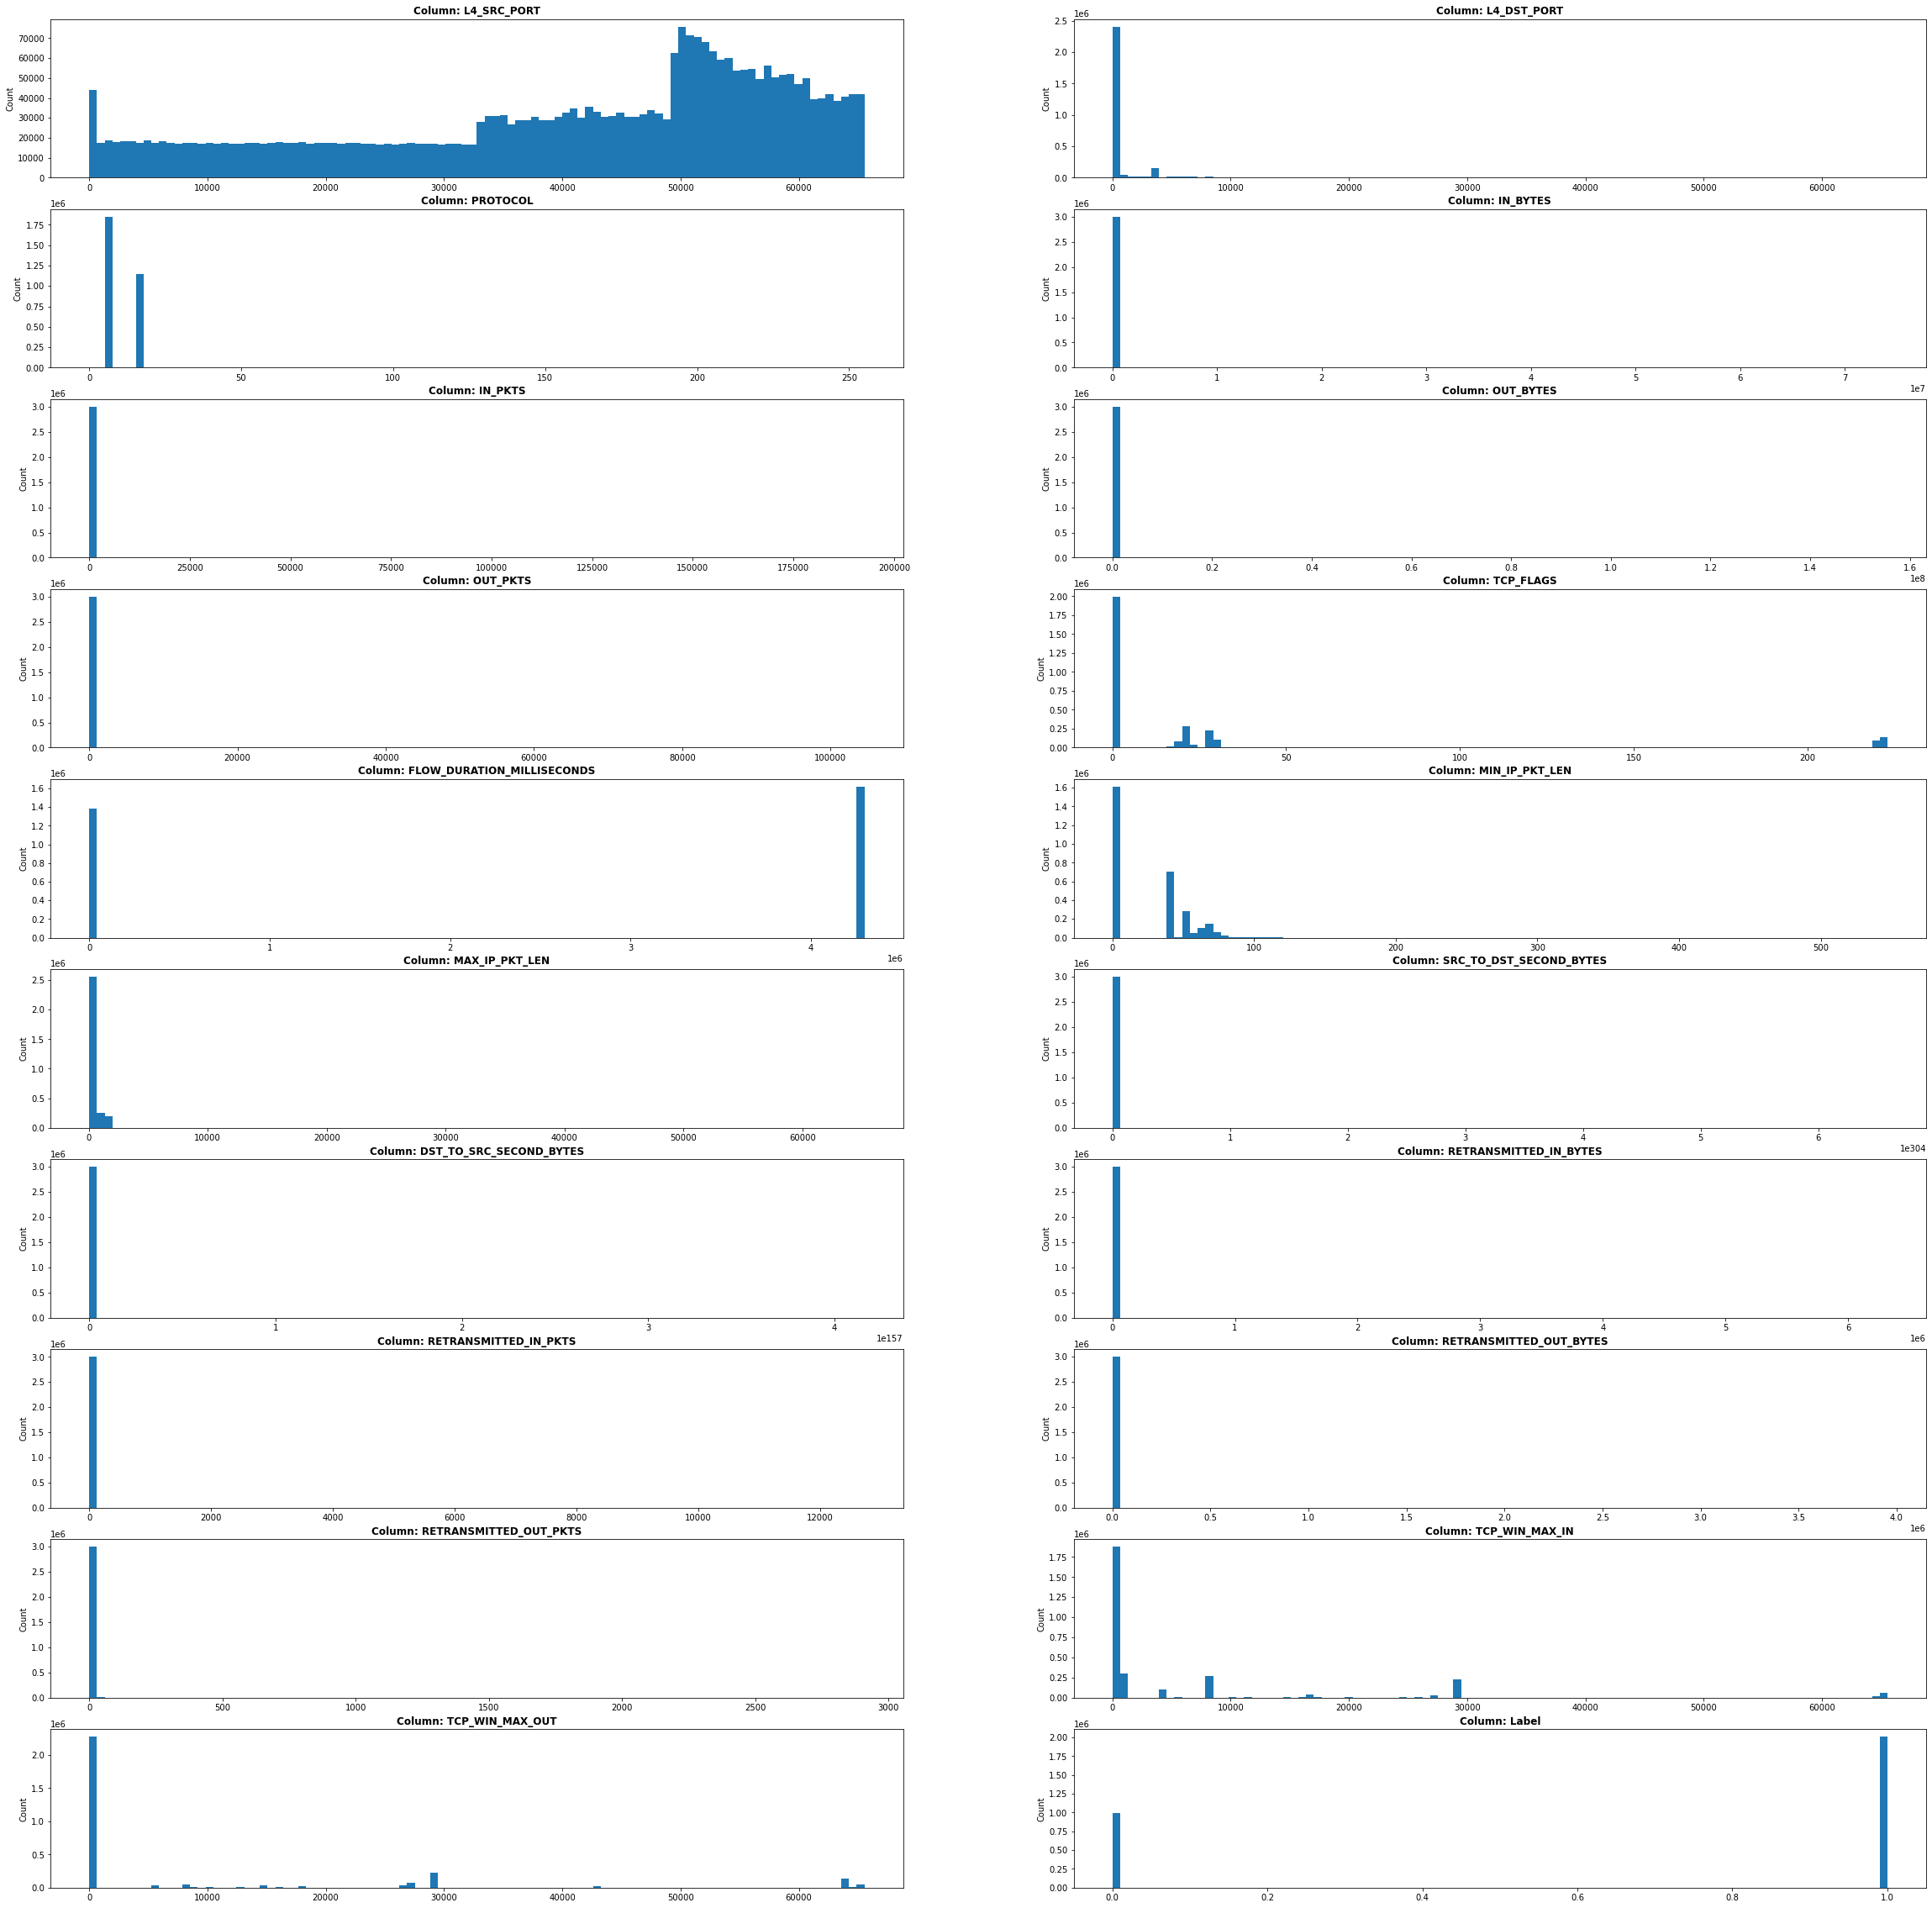

In [11]:
cols = ["L4_SRC_PORT","L4_DST_PORT","PROTOCOL","IN_BYTES","IN_PKTS","OUT_BYTES","OUT_PKTS","TCP_FLAGS","FLOW_DURATION_MILLISECONDS",
        "MIN_IP_PKT_LEN","MAX_IP_PKT_LEN", "SRC_TO_DST_SECOND_BYTES", "DST_TO_SRC_SECOND_BYTES", "RETRANSMITTED_IN_BYTES","RETRANSMITTED_IN_PKTS","RETRANSMITTED_OUT_BYTES","RETRANSMITTED_OUT_PKTS",
        "TCP_WIN_MAX_IN","TCP_WIN_MAX_OUT", "Label"]

fig_nr_columns = 2
fig_nr_rows = 17
fig = plt.figure(1, figsize=[40,70])

for k in range(len(cols)):
    num_bins = 100
    ax = fig.add_subplot(fig_nr_rows, fig_nr_columns, k+1)
    ax.hist(df[cols[k]], num_bins)
    plt.title("Column: {}".format(cols[k]), fontweight='bold')
    plt.ylabel("Count")

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20616\3304964866.py:9: RuntimeWarning: divide by zero encountered in true_divide
  modified_z_score = 0.6745 * diff / med_abs_deviation
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20616\3304964866.py:9: RuntimeWarning: invalid value encountered in true_divide
  modified_z_score = 0.6745 * diff / med_abs_deviation
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20616\3304964866.py:9: RuntimeWarning: divide by zero encountered in true_divide
  modified_z_score = 0.6745 * diff / med_abs_deviation
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20616\3304964866.py:9: RuntimeWarning: invalid value encountered in true_divide
  modified_z_score = 0.6745 * diff / med_abs_deviation
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20616\3304964866.py:9: RuntimeWarning: divide by zero encountered in true_divide
  modified_z_score = 0.6745 * diff / med_abs_deviation
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20616\3304964866.py:9: RuntimeWarning: invalid value encountered

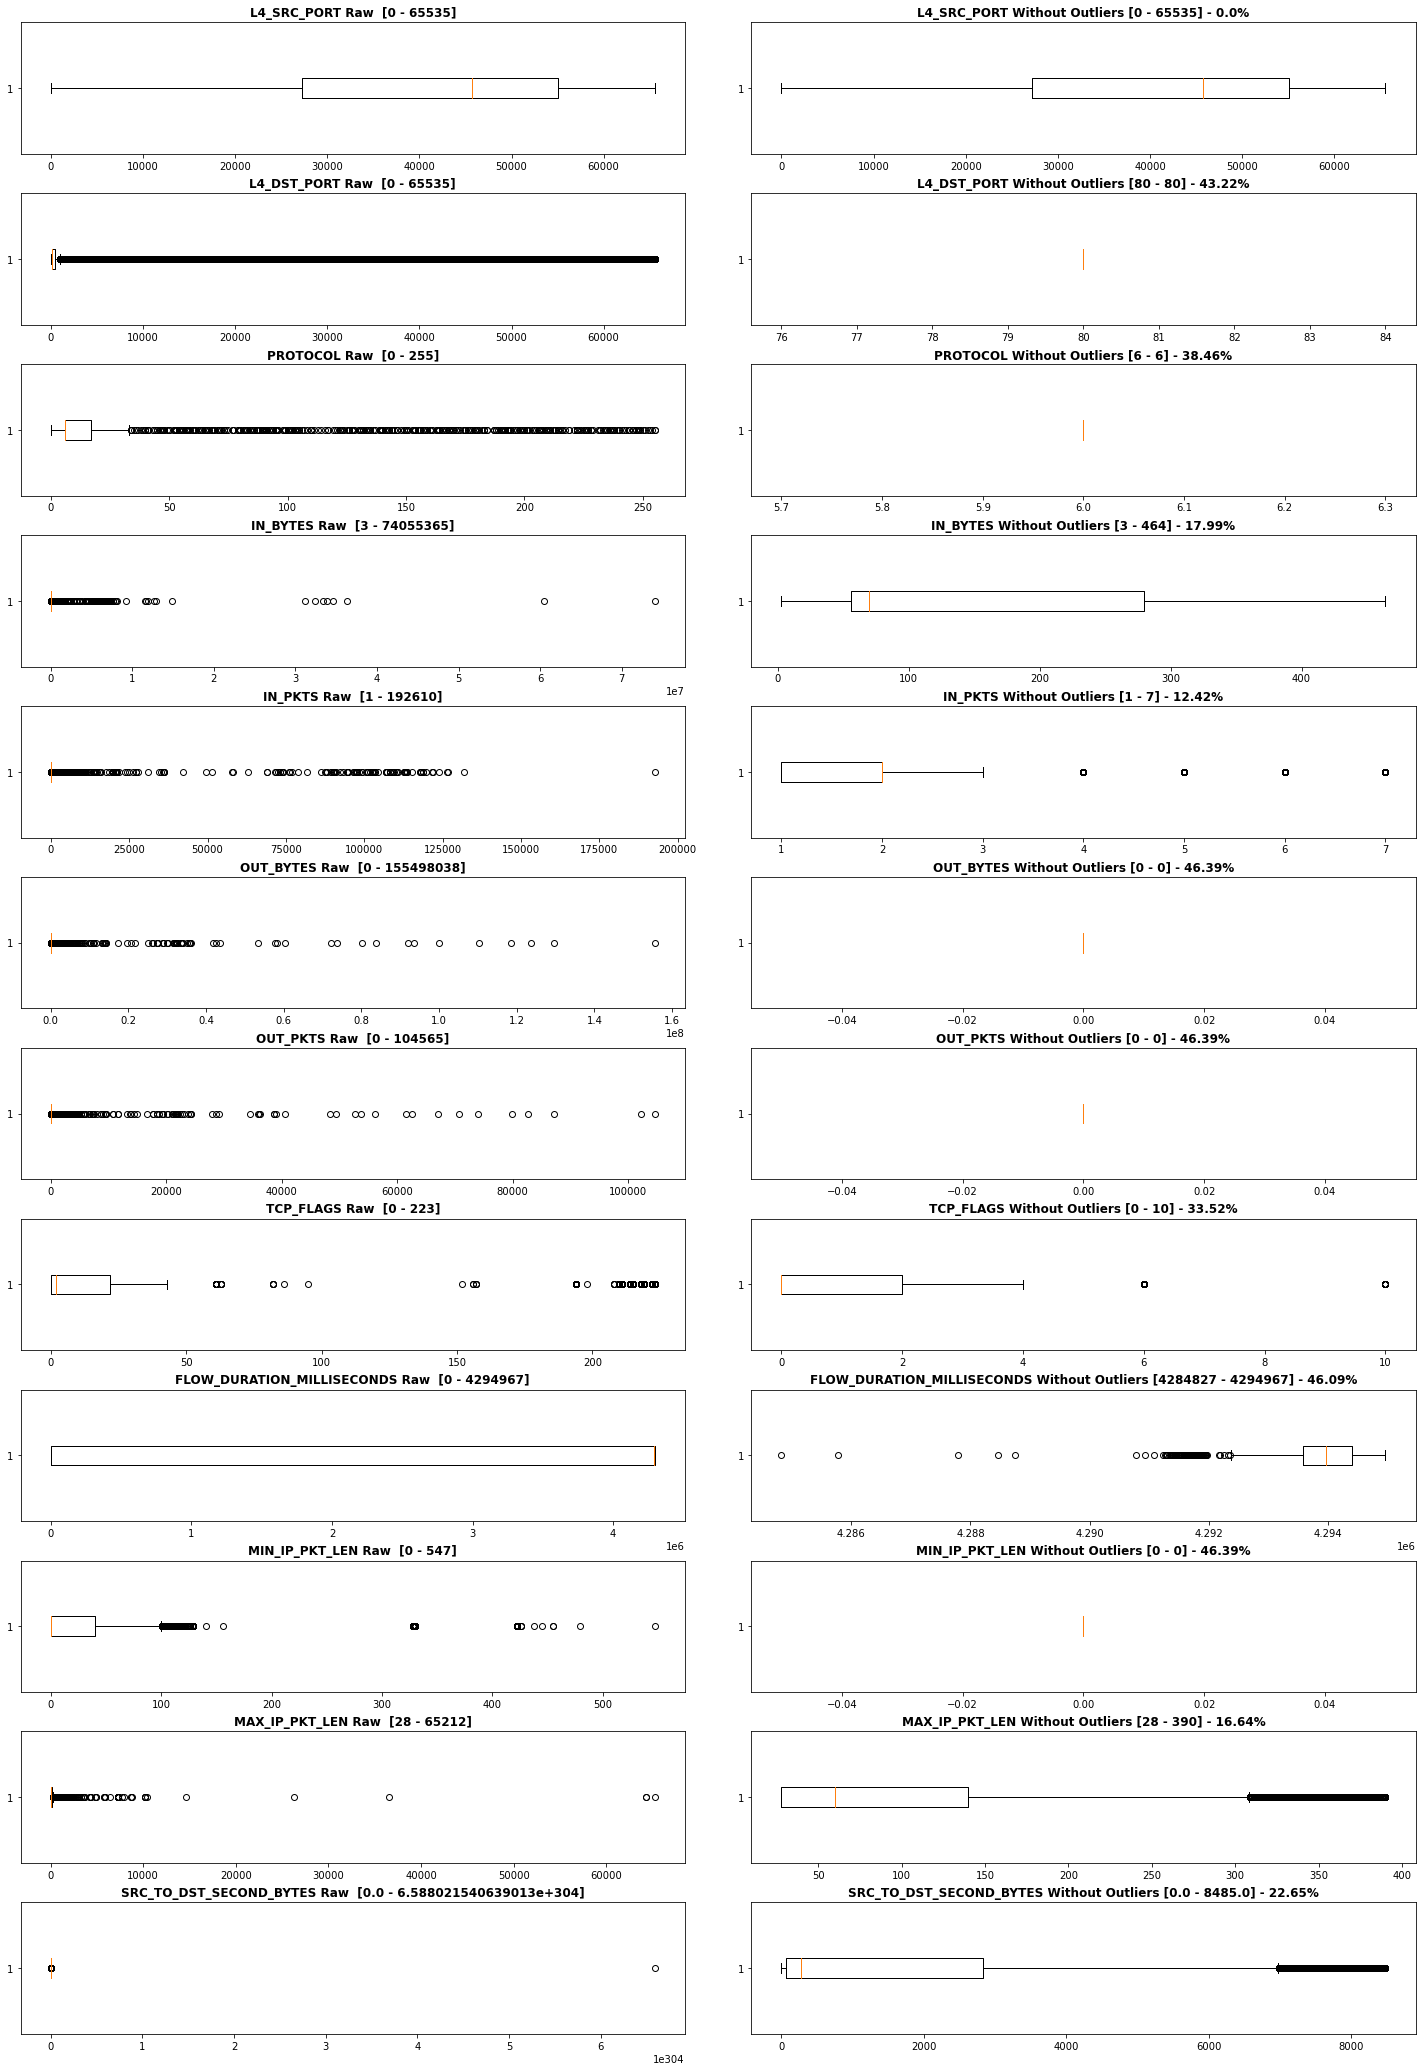

In [12]:
def is_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh


cols = ["L4_SRC_PORT","L4_DST_PORT","PROTOCOL","IN_BYTES","IN_PKTS","OUT_BYTES","OUT_PKTS","TCP_FLAGS","FLOW_DURATION_MILLISECONDS",
        "MIN_IP_PKT_LEN","MAX_IP_PKT_LEN", "SRC_TO_DST_SECOND_BYTES", "DST_TO_SRC_SECOND_BYTES", "RETRANSMITTED_IN_BYTES","RETRANSMITTED_IN_PKTS","RETRANSMITTED_OUT_BYTES","RETRANSMITTED_OUT_PKTS",
        "TCP_WIN_MAX_IN","TCP_WIN_MAX_OUT", "Label"]

fig_nr_columns = 2
fig_nr_rows = 12
c = 0
fig = plt.figure(1, figsize=[25,37])
for k in range(0,24,2):
    num_bins = 100
    plt.subplots_adjust(hspace=0.3, wspace=0.1)
    ax = fig.add_subplot(fig_nr_rows, fig_nr_columns, k+1)
    yvalues = np.array(df[cols[c]].dropna())
    ax.boxplot(yvalues, vert=False)
    plt.title("{} Raw  [{} - {}]".format(cols[c], yvalues.min(), yvalues.max()), fontweight='bold')
    
    ax = fig.add_subplot(fig_nr_rows, fig_nr_columns, k+2)
    yvalues_outliers = yvalues[~is_outlier(yvalues)]
    percenteOutliers = ( 1 - ( len(yvalues_outliers)/len(yvalues) ) ) * 100
    ax.boxplot(yvalues_outliers, vert=False)
    plt.title("{} Without Outliers [{} - {}] - {}%".format(cols[c], yvalues_outliers.min(), yvalues_outliers.max(),round(percenteOutliers,2)), fontweight='bold')
    c += 1
plt.show()

In [13]:
def ip2long(ip):
    """
    Convert an IP string to long
    """
    ip = '.'.join(ip.split('.')[:-1] + ['0'])
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

df.loc[:,'IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].copy().apply(ip2long)
df.loc[:,'IPV4_DST_ADDR'] = df['IPV4_DST_ADDR'].copy().apply(ip2long)
df.head(2)

IPV4_SRC_ADDR  L4_SRC_PORT IPV4_DST_ADDR  L4_DST_PORT  PROTOCOL  IN_BYTES   
0    3232261120        65389    3232261120           80         6       420  \
1    3232261120        11154    3232261120           80         6       280   

   IN_PKTS  OUT_BYTES  OUT_PKTS  TCP_FLAGS  FLOW_DURATION_MILLISECONDS   
0        3          0         0          2                     4293092  \
1        2         40         1         22                     4294499   

   MIN_IP_PKT_LEN  MAX_IP_PKT_LEN  SRC_TO_DST_SECOND_BYTES   
0               0             140                 140280.0  \
1              40             140                    280.0   

   DST_TO_SRC_SECOND_BYTES  RETRANSMITTED_IN_BYTES  RETRANSMITTED_IN_PKTS   
0                      0.0                     140                      1  \
1                     40.0                       0                      0   

   RETRANSMITTED_OUT_BYTES  RETRANSMITTED_OUT_PKTS  TCP_WIN_MAX_IN   
0                        0                       0             512  \
1                        0                       0             512   

   TCP_WIN_MAX_OUT  Label Attack L7_PROTO_NAME PROTOCOL_MAP  
0                0      1    DoS           CBT          tcp  
1                0      1    DoS           CBT          tcp

<AxesSubplot:xlabel='L4_SRC_PORT', ylabel='L4_DST_PORT'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


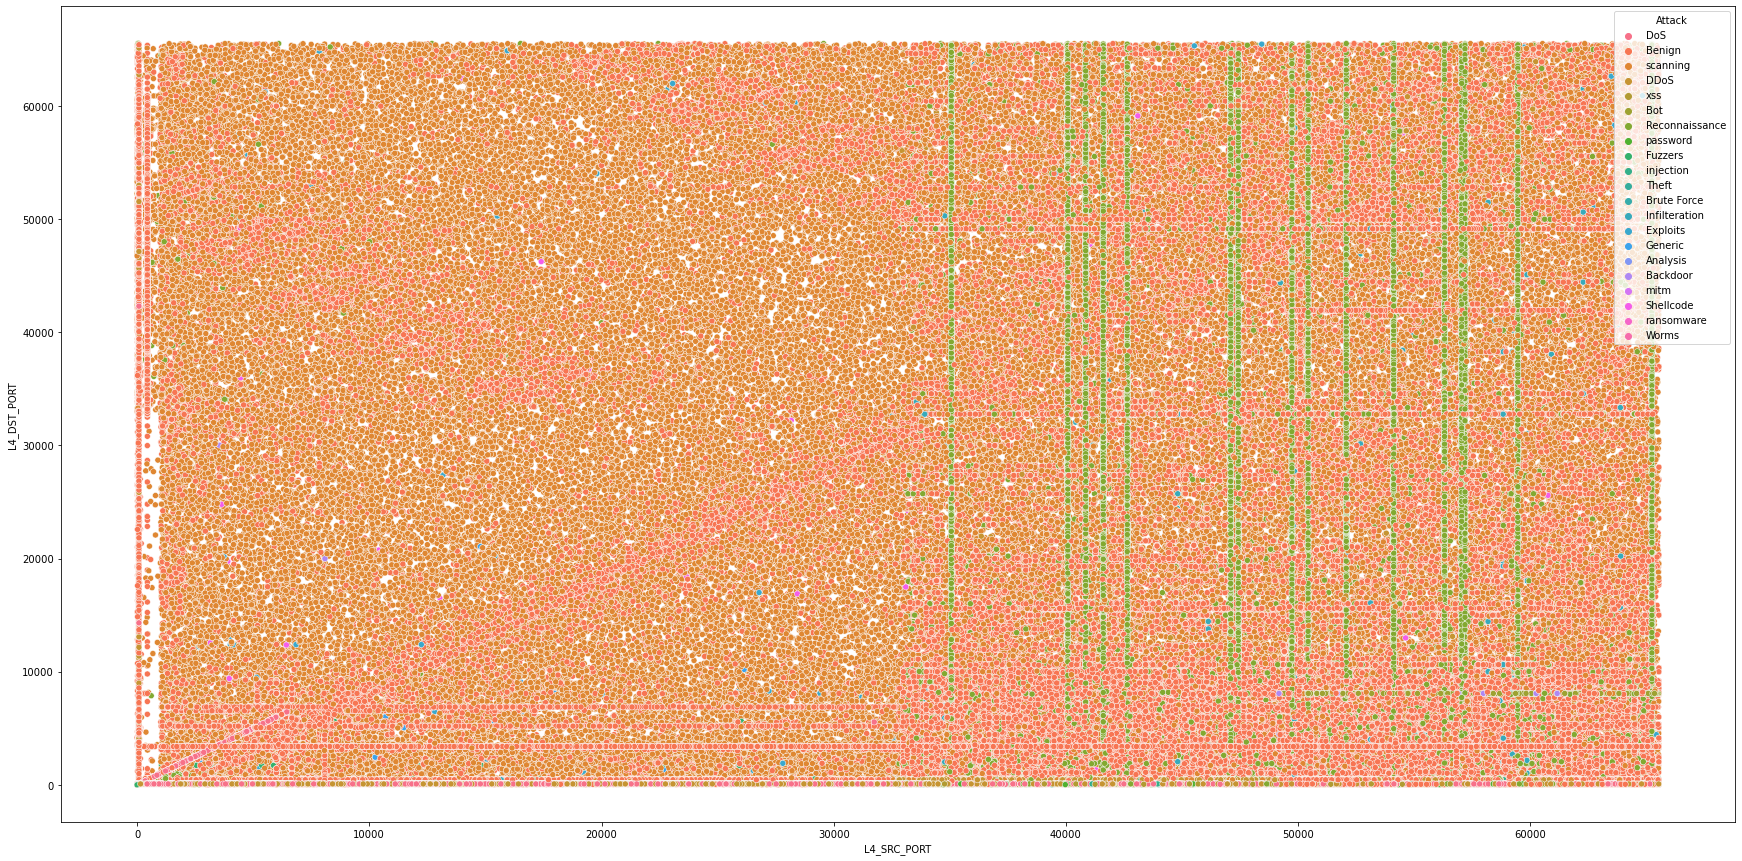

In [14]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.scatterplot(data=df, x="L4_SRC_PORT", y="L4_DST_PORT", hue="Attack", ax=ax)